In [7]:
import phoebe
from phoebe import u, c

import numpy as np

import os
import sys
from pathlib import Path
baseModulePath = str(Path(os.getcwd()).parents[2].absolute())
if baseModulePath not in sys.path:
	sys.path.append(baseModulePath)

import importlib
import analisis.phoebe_model.utils as gen_utils
import analisis.phoebe_model.optimizers.opt_utils as opt_utils
importlib.reload(gen_utils)
importlib.reload(opt_utils)

logger = phoebe.logger(clevel='WARNING')

In [3]:
b = phoebe.load("../bundle-saves/external-param-estimates-qonly")

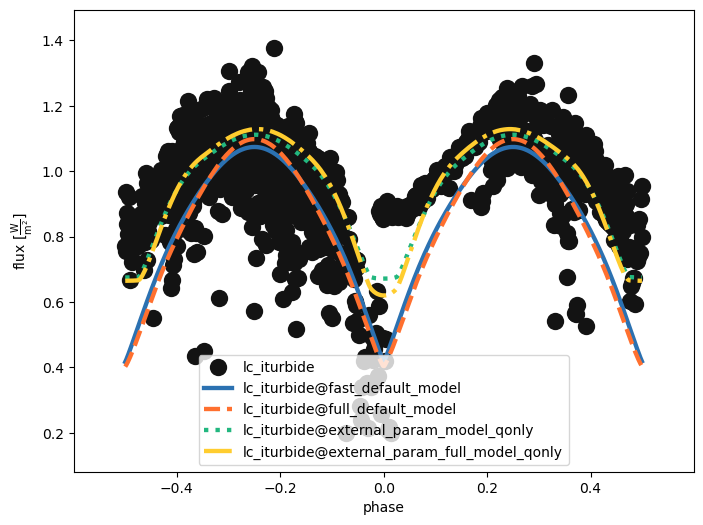

(<autofig.figure.Figure | 1 axes | 5 call(s)>,
 <Figure size 800x600 with 1 Axes>)

In [4]:
b.plot(x='phase', kind='lc', show=True, legend=True)

In [5]:
print(b['requiv'])
print(b['teff'])
print(b['ecc@binary'])
print(b['per0@binary'])

ParameterSet: 3 parameters
         requiv@primary@component: 1.5 solRad
C      requiv@secondary@component: 0.9977430824372558 solRad
                requiv@constraint: pot_to_requiv_contact({pot@contact_envelope@component}, {q@binary@component}, {sma@binary@component}, 2)
ParameterSet: 2 parameters
           teff@primary@component: 6000.0 K
         teff@secondary@component: 6000.0 K
Parameter: ecc@binary@component
                       Qualifier: ecc
                     Description: Eccentricity
                           Value: 0.0
                  Constrained by: 
                      Constrains: t0_perpass@binary@component, t0_ref@binary@component, ecosw@binary@component, esinw@binary@component
                      Related to: t0_supconj@binary@component, period@binary@component, per0@binary@component, dpdt@binary@component, dperdt@binary@component, t0@system, t0_perpass@binary@component, t0_ref@binary@component, ecosw@binary@component, esinw@binary@component

Parameter: per

In [5]:
print(b['requivsumfrac'])
print(b['requivratio'])
print(b['teffratio'])
print(b['incl@binary'])
print(b['ecosw'])
print(b['esinw'])

ParameterSet: 2 parameters
C  requivsumfrac@binary@component: 0.7685363330576173
         requivsumfrac@constraint: ({requiv@primary@component} + {requiv@secondary@component}) / {sma@binary@component}
ParameterSet: 2 parameters
C    requivratio@binary@component: 0.6651620549581706
           requivratio@constraint: {requiv@secondary@component} / {requiv@primary@component}
ParameterSet: 2 parameters
C      teffratio@binary@component: 1.0
             teffratio@constraint: {teff@secondary@component} / {teff@primary@component}
Parameter: incl@binary@component
                       Qualifier: incl
                     Description: Orbital inclination angle
                           Value: 90.0 deg
                  Constrained by: 
                      Constrains: asini@binary@component, asini@primary@component, incl@primary@component, asini@secondary@component, incl@secondary@component
                      Related to: sma@binary@component, asini@binary@component, q@binary@component, a

In [6]:
b.flip_constraint(qualifier='requivratio', solve_for='requiv@primary')
b.flip_constraint(qualifier='teffratio', solve_for='teff@primary')
b.flip_constraint(qualifier='ecosw', solve_for='ecc@binary')
b.flip_constraint(qualifier='esinw', solve_for='per0@binary')
b.flip_constraint(qualifier='requivsumfrac', solve_for='sma@binary')

<ConstraintParameter: {sma@binary@component} = ({requiv@primary@component} + {requiv@secondary@component}) / {requivsumfrac@binary@component} (solar units) => 3.25 solRad>

## Add/run solvers

In [18]:
gen_utils.avoidAtmosphereErrors(b)
opt_utils.optimize_params(b, ['incl@binary', 'teffratio', 'requivratio', 'requivsumfrac', 'esinw', 'ecosw'], 'all_fast', True, compute='fast_compute')

Mon, 10 Jul 2023 19:23 PASSBANDS    WARNING Online passbands unavailable (reached max tries).  Pass refresh=True to force another attempt or repeat_errors=False to avoid showing this message.


External Solver: ./external-jobs/optimizer.nelder_mead_opt_all_fast.py ./results/opt_all_fast_solution


In [6]:
gen_utils.resetAtmosphere(b)
opt_utils.optimize_params(b, ['requivsumfrac', 'incl@binary'], 'rsum_incl', True)

Tue, 11 Jul 2023 11:01 PASSBANDS    WARNING Online passbands unavailable (reached max tries).  Pass refresh=True to force another attempt or repeat_errors=False to avoid showing this message.


External Solver: ./external-jobs/optimizer.nelder_mead_opt_rsum_incl.py ./results/opt_rsum_incl_solution


## Adopt solutions

In [8]:
gen_utils.avoidAtmosphereErrors(b)
opt_utils.adopt_solution(b, 'all_fast', "./external-jobs/results/opt_all_fast_solution", compute='fast_compute')

incl@binary@orbit@component = 94.46 deg
teffratio@binary@orbit@component = 1.00 
requivratio@binary@orbit@component = 0.67 
requivsumfrac@binary@orbit@component = 0.77 
esinw@binary@orbit@component = 0.00 
ecosw@binary@orbit@component = 0.00 
ParameterSet: 1 parameters
            incl@binary@component: 90.0 deg
ParameterSet: 1 parameters
       teffratio@binary@component: 1.0
ParameterSet: 1 parameters
     requivratio@binary@component: 0.6651620549581706
ParameterSet: 1 parameters
   requivsumfrac@binary@component: 0.7685363330576173
ParameterSet: 1 parameters
           esinw@binary@component: 0.0
ParameterSet: 1 parameters
           ecosw@binary@component: 0.0
Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/home/ramon/anaconda3/envs/mapta-tesis-310/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3505, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_837212/3925616985.py", line 2, in <module>
    opt_utils.adopt_solution(b, 'all_fast', "./external-jobs/results/opt_all_fast_solution", compute='fast_compute')
  File "/home/ramon/uanl/Tesis/UANL_MAPTA_Observaciones/analisis/phoebe_model/optimizers/opt_utils.py", line 14, in adopt_solution
  File "/home/ramon/anaconda3/envs/mapta-tesis-310/lib/python3.10/site-packages/phoebe/frontend/bundle.py", line 13916, in adopt_solution
    changed_params += self.run_delayed_constraints()
  File "/home/ramon/anaconda3/envs/mapta-tesis-310/lib/python3.10/site-packages/phoebe/frontend/bundle.py", line 7821, in run_delayed_constraints
    changes += self.run_delayed_constraints()
  File "/home/ramon/anaconda3/envs/mapta-tesis-310/lib/python3.10/site-packa

In [16]:
# resetAtmosphere(b)
# logger.setLevel('WARNING')
# adopt_solution(b, 'rsum_incl', "./external-jobs/results/opt_nm_rsum_incl_solution", run_compute=False, compute='phoebe01')

print(b.solutions)
b.import_solution("./external-jobs/results/opt_nm_rsum_incl_solution", overwrite=True)

['lcperiod_solution', 'lcperiod_manual_solution', 'opt_rsum_incl_solution']


<ParameterSet: 12 parameters | qualifiers: fitted_units, comments, initial_values, message, adopt_values, adopt_distributions, fitted_uniqueids, fitted_twigs, success, niter, adopt_parameters, fitted_values>

In [19]:
printFittedVals(b, 'opt_rsum_incl_solution')
print('\n')
printFittedTwigsConstraints(b, 'opt_rsum_incl_solution')

requivsumfrac@binary@orbit@component = 0.77 
incl@binary@orbit@component = 100.07 deg


ParameterSet: 1 parameters
   requivsumfrac@binary@component: 0.7685363330576173
ParameterSet: 1 parameters
            incl@binary@component: 90.0 deg


In [22]:
logger.setLevel('DEBUG')
b.adopt_solution('opt_rsum_incl_solution', trial_run=True)
b.run_compute(compute='phoebe01', solution='opt_rsum_incl_solution', model='opt_rsum_incl_trial_model')
b.plot(x='phase', kind='lc', model='opt_rsum_incl_trial_model', show=True, legend=True)

Tue, 11 Jul 2023 11:20 BUNDLE       WARNING applying passed solution (opt_rsum_incl_solution) to sample_from
Tue, 11 Jul 2023 11:20 BUNDLE       WARNING defaulting sample_num=1 since adopt_distributions@opt_rsum_incl_solution=False
Tue, 11 Jul 2023 11:20 PASSBANDS    WARNING Online passbands unavailable (reached max tries).  Pass refresh=True to force another attempt or repeat_errors=False to avoid showing this message.
Tue, 11 Jul 2023 11:20 BACKENDS     INFO    run_compute sample_from: serial mode
Tue, 11 Jul 2023 11:20 BACKENDS     WARNING only one sample, falling back on sample_mode='all', sample_num=1 instead of sample_mode='1-sigma', sample_num=1
  0%|          | 0/1 [00:10<?, ?it/s]
Tue, 11 Jul 2023 11:20 PARAMETERS   DEBUG   changing value of requivsumfrac@binary@orbit@component triggers delayed constraints ['requiv@primary@star@constraint', 'sma@binary@orbit@constraint']
Tue, 11 Jul 2023 11:20 PARAMETERS   DEBUG   changing value of incl@binary@orbit@component triggers delayed 

KeyboardInterrupt: 